### 참고 사이트

+ http://matplotlib.org
+ http://seaborn.pydata.org

### 기본 그래프

선(line), 막대(bar), 히스토그램(histogram), 산포도(scatter), 상자(box)

### 1) 질적 데이터
    - 요약 방법 : 도표
    - 정리 방법 : 도수 분포표, 분할표(R_table)
    - 그래프 : 막대 그래프, 원 그래프, ...

### 2) 양적 데이터
    - 요약 방법 : 수치
    - 정리 방법 : 산술평균, 중앙값, ...
    - 그래프 : 히스토그램, Boxplot, ,시계열(선) 그래프, 산포도(산점도) 

In [16]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

#### 선 그래프

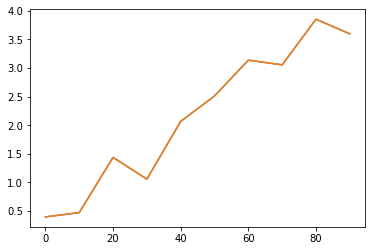

In [8]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s
s.plot()  # x축=인덱스, y=값
s.plot.line()


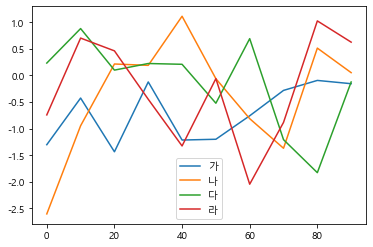

In [17]:
df1 = pd.DataFrame(np.random.randn(10, 4), columns=["가", "나", "다", "라"], index=np.arange(0, 100, 10))
df1
df1.plot()

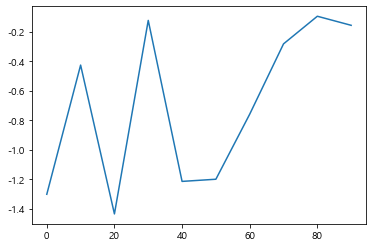

In [18]:
df1["가"].plot()

#### 막대 그래프

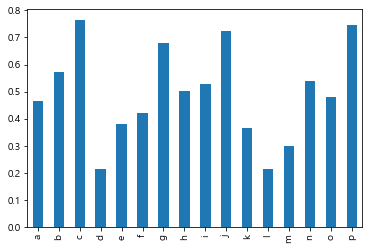

In [1]:
s2 = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))
s2
s2.plot(kind="bar")
s2.plot.bar()

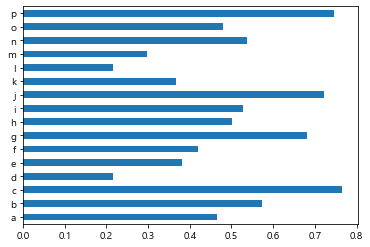

In [2]:
# 수평 막대그래프
s2.plot(kind="barh") 
s2.plot.barh()

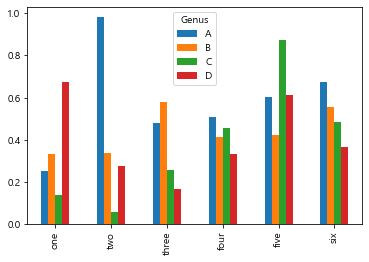

In [6]:
df2 = pd.DataFrame(np.random.rand(6, 4), index=["one", "two", "three", "four", "five", "six"], 
                   columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df2
df2.plot(kind="bar")

In [ ]:
df2.plot(kind="barh", stacked=True)  # 하나의 막대로 쌓아올리기

### 히스토그램

+ X변수가 가질 수 있는 값의 범위
+ 값만 필요하고 인덱스는 필요없다.

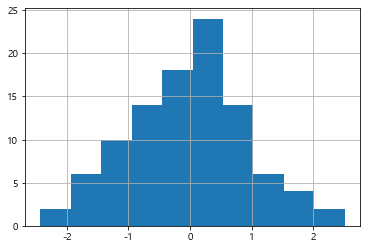

In [11]:
s = pd.Series(np.random.normal(0, 1, size=100))   # 정규 분포를 이루는 난수 추출
s
s.hist()  # 히스토그램~10등분 간격이 기본

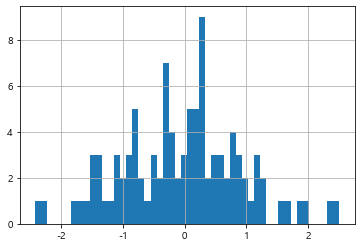

In [12]:
s.hist(bins=50)  # 막대의 세분화

#### 산포도(Scatter plot)

+ 두 변수의 관계를 확인 : 양, 음

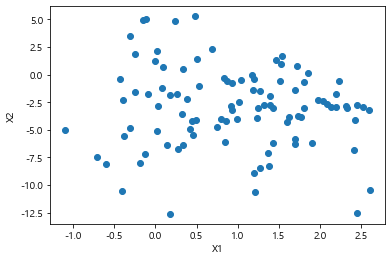

In [20]:
x1 = np.random.normal(1, 1, size=(100, 1))  # 100행 1열 2차원 배열
x1

x2 = np.random.normal(-2, 4, size=(100, 1))  
x2

x = np.concatenate((x1, x2), axis=1)  # 두 데이터를 연결_concatenate()
x[:5]

df = pd.DataFrame(x, columns=["X1", "X2"])
df.head()

df.plot.scatter("X1", "X2")
plt.scatter(df["X1"], df["X2"])

#### 상자그래프(Box plot)

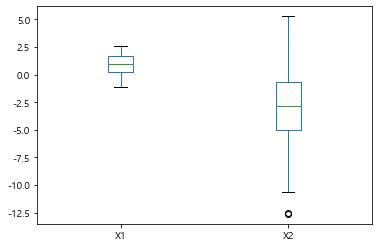

In [22]:
df.plot.box()  # 산포도의 확장버전

---
### matplotlib을 이용한 그래프 그리기

In [24]:
# 데이터 준비
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0, 0.5, 'Total Bill')

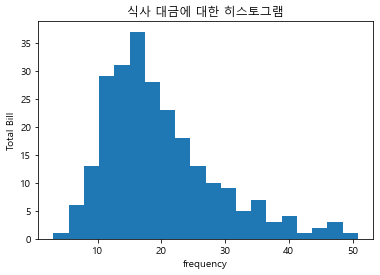

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)  # 1행 1열 1그래프

# total_bill에 대한 금액 분포를 확인
ax.hist(tips["total_bill"], bins=20)
ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

Text(0, 0.5, 'Tip')

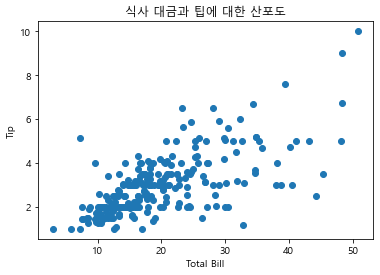

In [31]:
# Tip과 Total_bill의 관계를 알고 싶다.

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips["tip"])
ax.set_title("식사 대금과 팁에 대한 산포도")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

Text(0, 0.5, 'Tip')

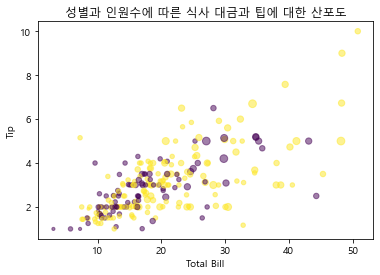

In [40]:
# 성별에 따른 Tip과 Total_bill의 관계를 알고 싶다.

def record_sex(sex):
    if sex == "Female":
        return 0
    else:
        return 1

tips["sex_color"] = tips["sex"].apply(record_sex)
tips.head()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips["tip"], c=tips["sex_color"], s=tips["size"]*10, alpha=0.5)
ax.set_title("성별과 인원수에 따른 식사 대금과 팁에 대한 산포도")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

Text(0.5, 1.0, '성별에 따른 팁에 대한 box plot')

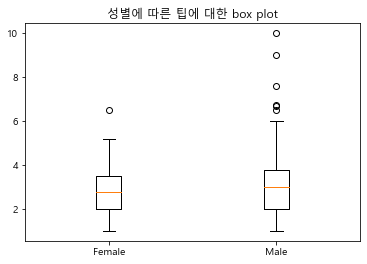

In [42]:
# 성별과 tip의 관계

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.boxplot([tips[tips["sex"]=="Female"]["tip"], tips[tips["sex"]=="Male"]["tip"]],
          labels=["Female", "Male"])
ax.set_title("성별에 따른 팁에 대한 box plot")

---
#### seaborn

In [46]:
tips = sns.load_dataset("tips")

Text(0, 0.5, 'Total Bill')

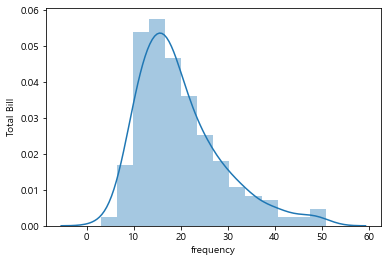

In [49]:
ax = plt.subplot(1, 1, 1)
ax = sns.distplot(tips["total_bill"])
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

Text(0, 0.5, 'Total Bill')

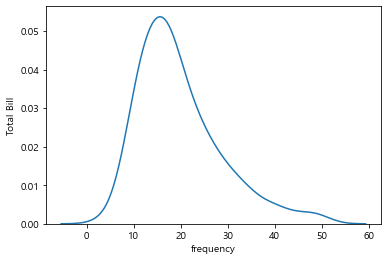

In [48]:
ax = plt.subplot(1, 1, 1)
ax = sns.distplot(tips["total_bill"], hist=False)
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

Text(0, 0.5, 'Total Bill')

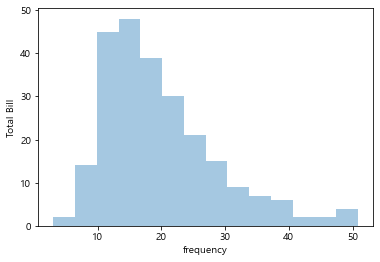

In [50]:
ax = plt.subplot(1, 1, 1)
ax = sns.distplot(tips["total_bill"], kde=False)  # kernel density estimation: 비모수 추정방법
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

Text(0, 0.5, 'Total Bill')

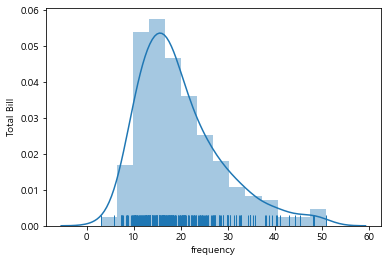

In [51]:
ax = plt.subplot(1, 1, 1)
ax = sns.distplot(tips["total_bill"], rug=True)
ax.set_xlabel("frequency")
ax.set_ylabel("Total Bill")

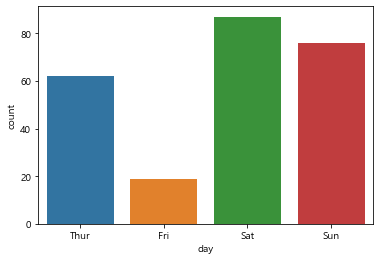

In [52]:
# 막대 그래프
sns.countplot("day", data=tips)

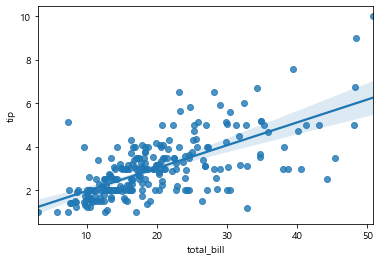

In [54]:
# 산포도(회귀선 포함)
sns.regplot(x="total_bill", y="tip", data=tips)

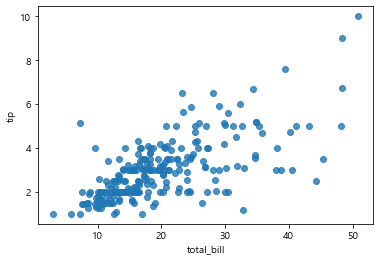

In [55]:
# 산포도(회귀선 미포함)
sns.regplot(x="total_bill", y="tip", data=tips, fit_reg=False)

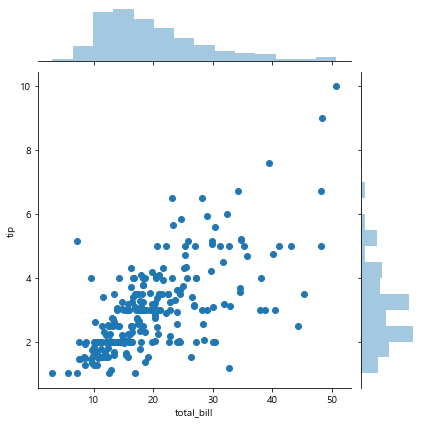

In [58]:
# 산포도+히스토그램(seaborn)
sns.jointplot(x="total_bill", y="tip", data=tips)

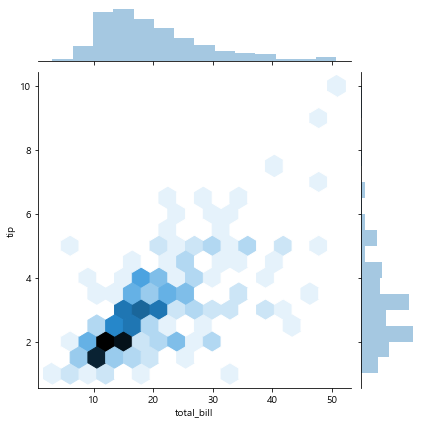

In [59]:
# 산포도+히스토그램_옵션추가(seaborn)
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")

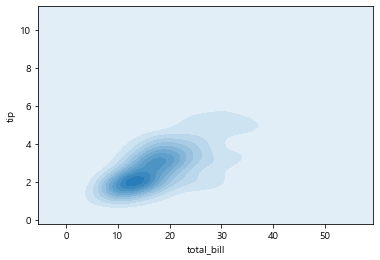

In [61]:
# 등고선
sns.kdeplot(data=tips["total_bill"], data2=tips["tip"], shade=True) # kde : 밀도추정방식

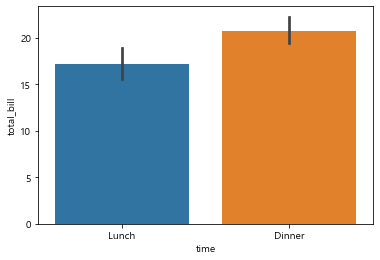

In [62]:
# 관계 검정 막대그래프
sns.barplot(x="time", y="total_bill", data=tips)

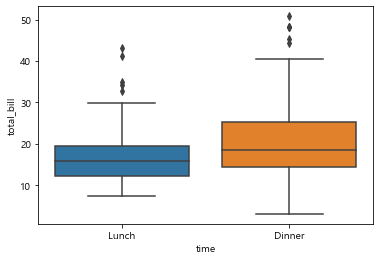

In [63]:
# 상자 그래프
sns.boxplot(x="time", y="total_bill", data=tips)

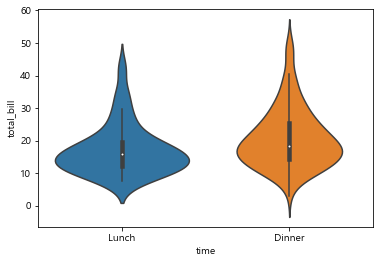

In [64]:
# 바이올린 그래프
sns.violinplot(x="time", y="total_bill", data=tips)

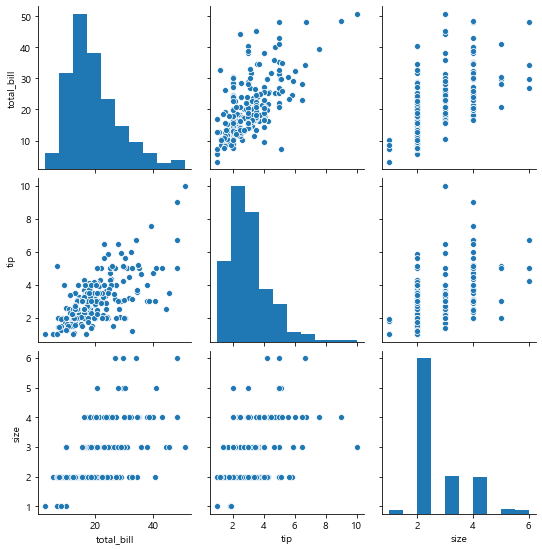

In [66]:
# 여러 변수를 한꺼번에 모아서 
sns.pairplot(tips)

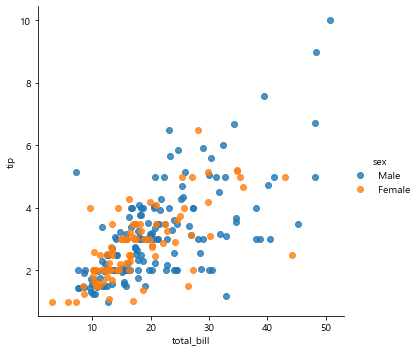

In [69]:
# 성별로 전체 식사대금과 팁의 관계를 확인 
sns.lmplot(x="total_bill", y="tip", data=tips, fit_reg=False, hue="sex") # lm_leanear model(선형회귀)

ValueError: s must be a scalar, or the same size as x and y

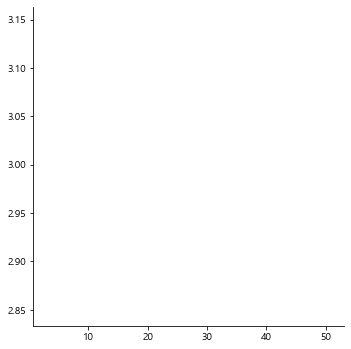

In [70]:
# 옵션추가
#sns.lmplot(x="total_bill", y="tip", data=tips, fit_reg=False, hue="sex", scatter_kws={"s":tips["size"]*10})

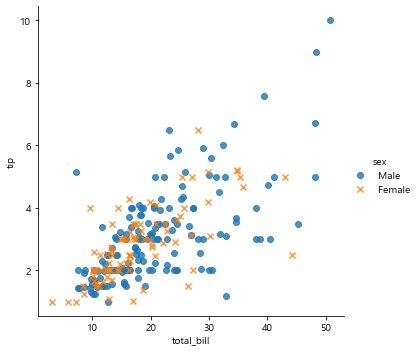

In [71]:
# 옵션추가_점의 모양 변화
sns.lmplot(x="total_bill", y="tip", data=tips, fit_reg=False, hue="sex", markers=["o", "x"] )

---
### 지도 시각화

+ pip install folium

In [72]:
!pip install folium

In [1]:
import folium

In [2]:
# 기본
map = folium.Map(location=[35.063847, 128.085075]) # location=[위도, 경도]/ 구글맵<원하는 위치 우클릭
map = folium.Map(location=[35.063847, 128.085075], zoom_start=15)
map = folium.Map(location=[35.063847, 128.085075], zoom_start=15, tiles="Stamen Toner")  # 흑백
map

In [3]:
state_unemp = pd.read_csv("data/map/folium_US_Unemployment_Oct2012.csv")
state_unemp.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [4]:
# State의 위도 경도 등록=json file
state_geo = "data/map/folium_us-states.json"

# 미국 지도
map = folium.Map(location=[40, -98], zoom_start=4)
map.choropleth(geo_data=state_geo, data=state_unemp, key_on="feature.id", 
               columns=["State","Unemployment"], fill_color="YlGn")
map

C:\Users\cecil\anaconda3\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [103]:
# Marker_특정 위치 표시
map = folium.Map(location=[37.501474, 127.027083], zoom_start=15)
map

#marker = folium.Marker(location=[37.501474, 127.027083], icon=folium.Icon(color="red", icon="star"))
#marker.add_to(map)
folium.Marker(location=[37.501826, 127.039780], popup="역삼역 근처", icon=folium.Icon(color="red", icon="star")).add_to(map)
map

# 특정 영역에 원으로 표시
folium.CircleMarker(location=[37.501826, 127.039780], popup="역삼역 근처", radius=50, color="#ffffgg",
                   fill_color="#fffggg").add_to(map)
map

# 지도만 html로 따로 저장
#map.save("data/map/map.html")

---
### WordCloud 

+pip install wordcloud

In [104]:
!pip install wordcloud

In [105]:
from wordcloud import WordCloud, STOPWORDS
# conda install wordcloud()

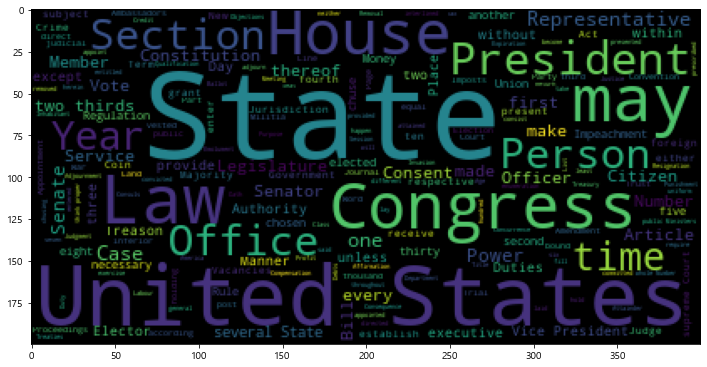

In [109]:
text = open("data/wordcloud/constitution.txt")
text = text.read()
text

wordcloud = WordCloud().generate(text)
dir(wordcloud)
wordcloud.words_

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud)

(-0.5, 399.5, 199.5, -0.5)

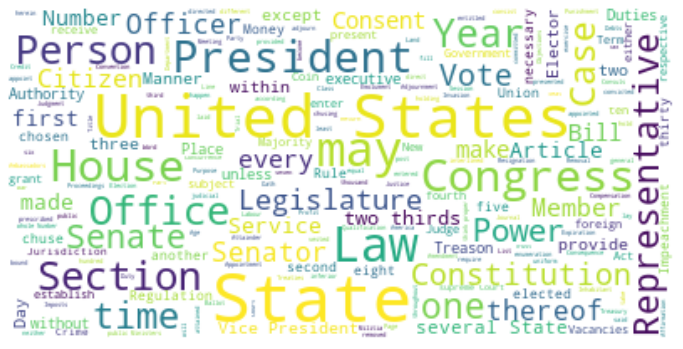

In [113]:
# wordcloud 객체 생성
wordcloud = WordCloud(max_font_size=40, background_color="white").generate(text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear") # 계단형식 보정
plt.axis("off")  # 그래프 축(눈금) 제거


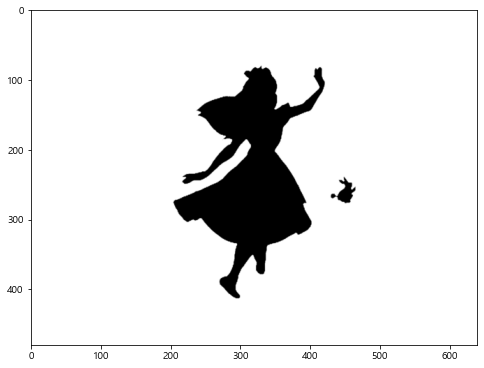

In [117]:
# 이미지 툴 안에 스탠실 형식으로 데이터 뿌리기
from PIL import Image

alice_mask = Image.open("data/wordcloud/alice_mask.png")
alice_mask

# 이미지를 숫자로 바꿔야함(흑백)
alice_mask = np.array(Image.open("data/wordcloud/alice_mask.png"))
alice_mask

plt.figure(figsize=(8, 8))
plt.imshow(alice_mask)

(-0.5, 639.5, 479.5, -0.5)

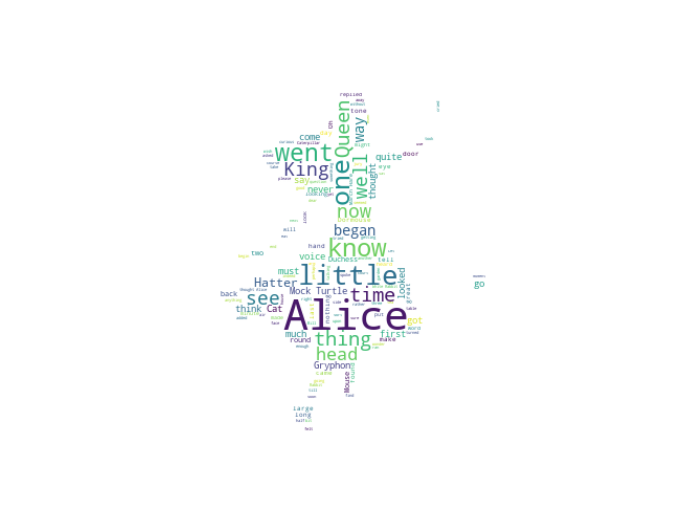

In [121]:
# wordcloud
text = open("data/wordcloud/alice.txt").read()
text

stopwords = set(STOPWORDS)  # 몇 %의 확률로 자주 등장하였나
stopwords.add("said")

wordcloud = WordCloud(max_font_size=40, background_color="white", 
                      mask=alice_mask, stopwords=stopwords, max_words=500).generate(text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [119]:
# 동용어 사전 = STOPWORDS
# 자료형은 딕트가 아니고, set!! 중복을 제거!! : { }
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

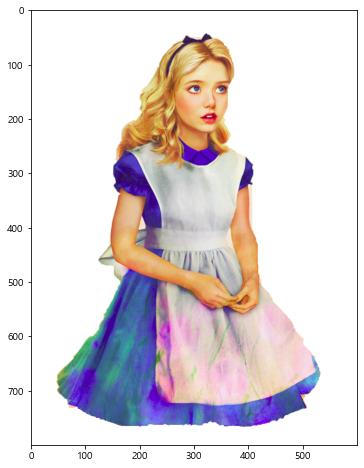

In [122]:
alice_color = np.array(Image.open("data/wordcloud/alice.png"))
alice_color

plt.figure(figsize=(8, 8))
plt.imshow(alice_color)

(-0.5, 599.5, 799.5, -0.5)

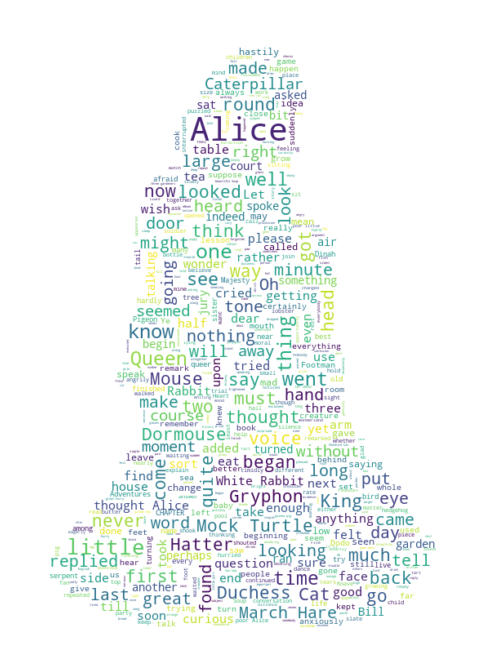

In [123]:
wordcloud = WordCloud(max_font_size=40, background_color="white", 
                      mask=alice_color, stopwords=stopwords, max_words=500).generate(text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 599.5, 799.5, -0.5)

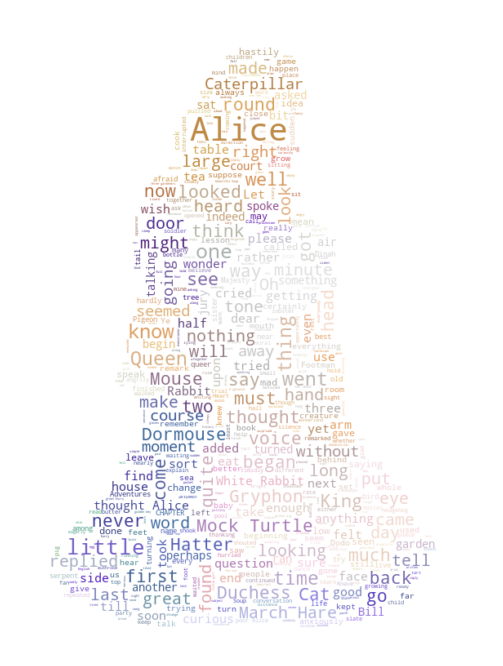

In [127]:
# 스포이드로 컬러 이미지에 맞는 색상뽑아서 그대로 적용
from wordcloud import ImageColorGenerator

image_colors = ImageColorGenerator(alice_color)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

In [ ]:
# http://konlpy.org
# pip install konlpy

In [129]:
!pip install konlpy

In [130]:
from konlpy.tag import Okt

In [131]:
import sys
sys.version

'3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]'

In [133]:
from konlpy.tag import Okt
from konlpy.corpus import kolaw   # 대한민국 현법 샘플
import nltk

(-0.5, 639.5, 479.5, -0.5)

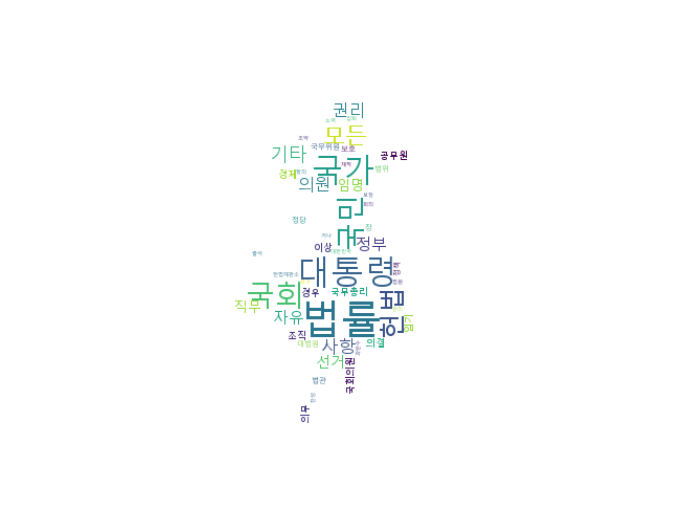

In [148]:
ko_text = kolaw.open("constitution.txt").read()
ko_text

# 형태소 분석
okt = Okt()
token_ko = okt.nouns(ko_text)  # 명사 구분 함수, 여러가지가 있음
token_ko

# 불용어 처리
stop_words = ["제", "월", "일", "조", "수", "때", "그", "이", "바", "및", "안", "정", "위", "관"]
# 리스트 컴프리헨션
token_ko = [each_word for each_word in token_ko if each_word not in stop_words]

# 워드 카운팅 (명사의 빈도수) 
ko = nltk.Text(token_ko, name="대한민국 헌범")
data = ko.vocab().most_common(50) # 가장 많이 등장한 50개

# wordcloud
wordcloud = WordCloud(background_color="white", mask=alice_mask, 
                      font_path="C:/Windows/Fonts/malgun.ttf").generate_from_frequencies(dict(data))
# generate_from_frequencies : 빈도수, dict형식으로 변경

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [ ]:
# 이상치, 결측치, 변수명, 파생변수 등의 전처리 방법 고민
# 준비한 질문에 대하여 